<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week- 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [1]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Load the Life expectancy dataset and display the first five records 

In [87]:
# load the csv file

df_lifeExp = pd.read_csv('Life_Expectancy.csv')

# type your code here

# display the first five observations

# type your code here

df_lifeExp.head(5)

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [88]:
# check the size of the dataframe
df_lifeExp.shape
# type your code here

(182, 20)

In [89]:
# display dataset information understand the dataset
df_lifeExp.info()
# type your code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
df_life.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

In [91]:
df_lifeExp = df_lifeExp.dropna(subset=['Life_Expectancy'],axis='index')

In [92]:
df_lifeExp.shape

(173, 20)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

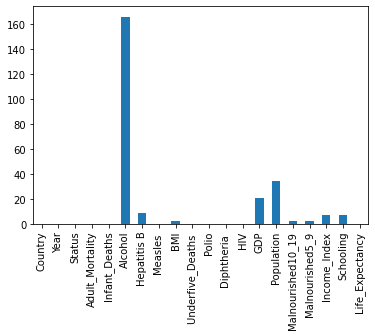

In [95]:
df_lifeExp.isnull().sum().plot(kind='bar')
plt.show()

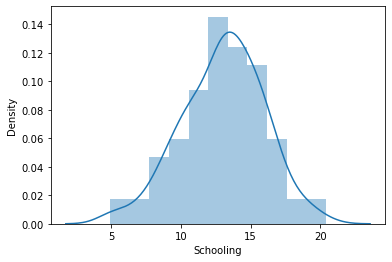

In [96]:
sns.distplot(df_lifeExp['Schooling'])
plt.show()

In [97]:
df_lifeExp.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ',
       'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [98]:
df_lifeExp = df_lifeExp.drop('Alcohol',axis=1)

In [99]:
df_lifeExp.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ', 'Polio',
       'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

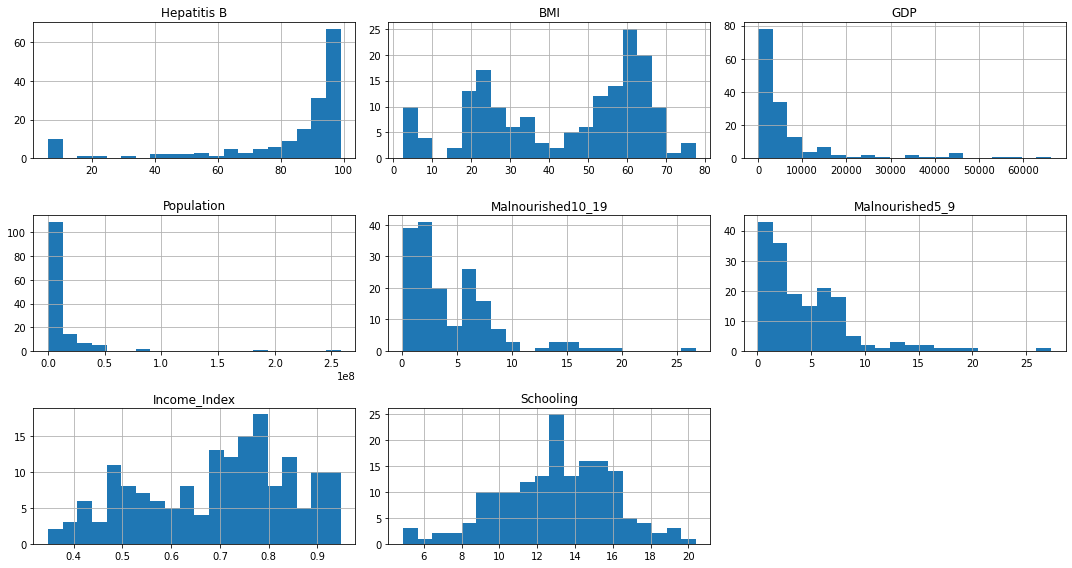

In [100]:
# extract all the variables with missing values in a new dataframe 'df_missing_values'
df_missing_values = df_lifeExp[['Hepatitis B','BMI','GDP','Population','Malnourished10_19',
                                'Malnourished5_9','Income_Index','Schooling']]

# plot histogram of all variables which have missing values
# set the number of bins to 20
# set the figure size using 'figsize'
df_missing_values.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()


In [101]:
# impute skewed variables with median

# impute for variable 'GDP'
df_lifeExp['GDP'] = df_lifeExp['GDP'].fillna(df_lifeExp['GDP'].median())

# impute for variable 'Hepatitis B'
df_lifeExp['Hepatitis B'] = df_lifeExp['Hepatitis B'].fillna(df_lifeExp['Hepatitis B'].median())


# impute for variable 'Malnourished10_19'
df_lifeExp['Malnourished10_19'] = df_lifeExp['Malnourished10_19'].fillna(df_lifeExp['Malnourished10_19'].median())


# impute for variable 'Malnourished5_9'
df_lifeExp['Malnourished5_9'] = df_lifeExp['Malnourished5_9'].fillna(df_lifeExp['Malnourished5_9'].median())


# impute for variable 'Population'
df_lifeExp['Population'] = df_lifeExp['Population'].fillna(df_lifeExp['Population'].median())


In [102]:
df_lifeExp['BMI'] = df_lifeExp['BMI'].fillna(df_lifeExp['BMI'].mean())
df_lifeExp['Schooling'] = df_lifeExp['Schooling'].fillna(df_lifeExp['Schooling'].mean())

In [103]:
df_lifeExp['Income_Index'] = df_lifeExp['Income_Index'].fillna(df_lifeExp['Income_Index'].mean())

In [104]:
df_lifeExp.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [105]:
del df_lifeExp['Country']

In [106]:
df_lifeExp.describe(include = ['int64','float64'])

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2014.988439,149.971098,22.872832,82.716763,1559.208092,43.466667,30.352601,83.040462,84.508671,0.647399,6764.134560,9.663690e+06,4.492486,4.539306,0.695627,12.995783,72.007514
std,0.152057,95.679846,84.268577,24.066903,8055.443243,20.378109,108.428722,24.833951,22.687364,1.361795,11095.340318,2.650522e+07,4.131178,4.217814,0.150721,2.879849,8.032405
min,2013.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000,51.000000
25%,2015.000000,74.000000,0.000000,81.000000,0.000000,24.400000,0.000000,84.000000,84.000000,0.100000,918.677154,5.874820e+05,1.500000,1.500000,0.576000,11.100000,66.200000
50%,2015.000000,137.000000,2.000000,93.000000,16.000000,51.000000,3.000000,93.000000,94.000000,0.100000,3124.343999,2.174645e+06,3.300000,3.300000,0.723000,13.100000,74.100000
75%,2015.000000,199.000000,17.000000,97.000000,212.000000,61.600000,21.000000,97.000000,97.000000,0.300000,6461.192554,7.177991e+06,6.400000,6.400000,0.798000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


In [107]:
df_lifeExp.Year.value_counts()

# No use

2015    172
2013      1
Name: Year, dtype: int64

In [108]:
del df_lifeExp['Year']

In [109]:
del df_lifeExp['Infant_Deaths']

# DRoppping this feature since we have Under_five deaths

In [110]:
df_lifeExp.shape

(173, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [111]:
df_lifeExp['Status'] =  pd.get_dummies(data = df_lifeExp['Status'],drop_first=True)

In [112]:
df_lifeExp.head()

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.0,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,1,74.0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,1,19.0,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,1,335.0,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,1,13.0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,0.784,13.9,76.4


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [114]:
# select the independent variables
X = df_lifeExp.iloc[:,:15]

# to estimate the regression coefficient , a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# build a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()

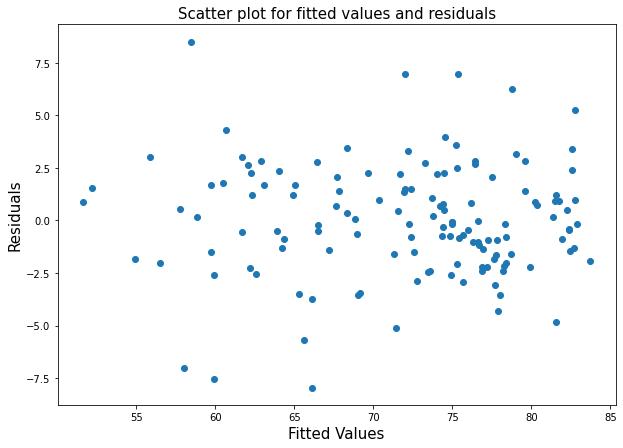

In [115]:
# compute the fitted values
y_pred = MLR_model.fittedvalues

# compute the fitted values and residuals
res = MLR_model.resid

# set the figure size 
plt.figure(figsize=(10,7))

# plot a scatter plot for predicted values and residuals
plt.scatter(x = y_pred, y = res)

# add plot title
# set text size using 'fontsize'
plt.title('Scatter plot for fitted values and residuals', fontsize = 15)

# add axis label
# set text size using 'fontsize'
plt.xlabel('Fitted Values', fontsize = 15)

# add axis label
# set text size using 'fontsize'
plt.ylabel('Residuals', fontsize = 15)

# display the plot
plt.show()


In [116]:
# Residuals have lot of variance
# Homo Schdasticity

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# select the variables describing immunization : Hepatitis B, Polio and Diphtheria
X = df_lifeExp.iloc[:,[2,6,7]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X, y)

# predict the values of target variable using train data
y_pred = MLR_model.predict(X)

# capture all the residuals of the model in a numpy array
residuals = np.array(y - y_pred)

# calculate unexplained_variation 
unexplained_variation = np.sum(residuals**2)

print("The unexplained variation for the model is",unexplained_variation)
# SSE

The unexplained variation for the model is 7272.464916334295


In [118]:
SSE = np.sum((y-y_pred)**2)

SSE

7272.464916334295

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

In [120]:
X = X_train[['Malnourished10_19','Malnourished5_9']]

X = sm.add_constant(X)
mlr_model = sm.OLS(y_train,X).fit()

print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     19.66
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           3.20e-08
Time:                        18:13:16   Log-Likelihood:                -466.03
No. Observations:                 138   AIC:                             938.1
Df Residuals:                     135   BIC:                             946.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.3070      0.91

In [121]:
# Both are not significant
# Each increase in Malnutrition will decrease the Life Expectancy

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [122]:
# select the variable describing adult mortality rate
# reshape(): used to change the dimension of input since SGDRegressor expects atleast a 2-D numpy array
X = df_lifeExp.iloc[:,1].values
X = X.reshape(-1,1)

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [123]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# predict the values of target variable using entire data
lin_pred = MLR_model.predict(X_train)

In [124]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# predict the values of target variable using entire data
sgd_pred = linreg_with_SGD.predict(X_train)

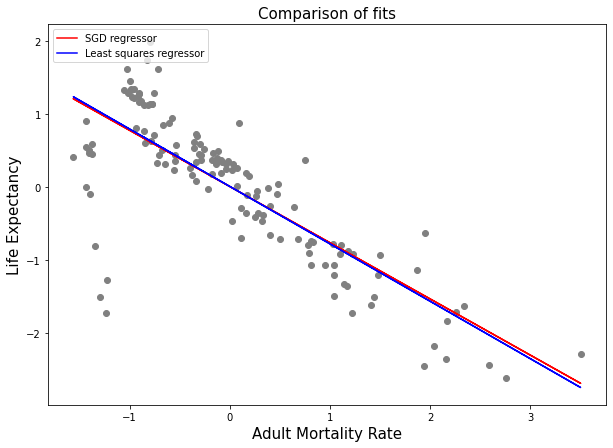

In [125]:
# set the figure size 
plt.figure(figsize=(10,7))

# plot the scatter plot
# colors: set the color of the points in the scatter plot
plt.scatter(X_train, y_train,color='grey')

# set xlabel for the plot
plt.xlabel("Adult Mortality Rate",fontsize = 15)

# set ylabel for the plot
plt.ylabel("Life Expectancy",fontsize = 15)

# set title for the plot
plt.title("Comparison of fits",fontsize = 15)

# plot the regression line for the two models
# color: set the color of the line
# label: set the label of the line for the legend
plt.plot(X_train,sgd_pred,color='red',label='SGD regressor')
plt.plot(X_train,lin_pred,color='blue',label='Least squares regressor')

# set the position of legend
plt.legend(loc='upper left')

# disply the plot
plt.show()

In [126]:
# No difference

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
# select the variable describing adult mortality rate
# reshape(): used to change the dimension of input since SGDRegressor expects atleast a 2-D numpy array
X = df_lifeExp.iloc[:,[2,6,7]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [128]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

In [129]:
df_immunization=df_lifeExp.iloc[:,[2,6,7]]

In [130]:
MLR_model.coef_

array([-0.15601111,  0.34100566,  0.4432324 ])

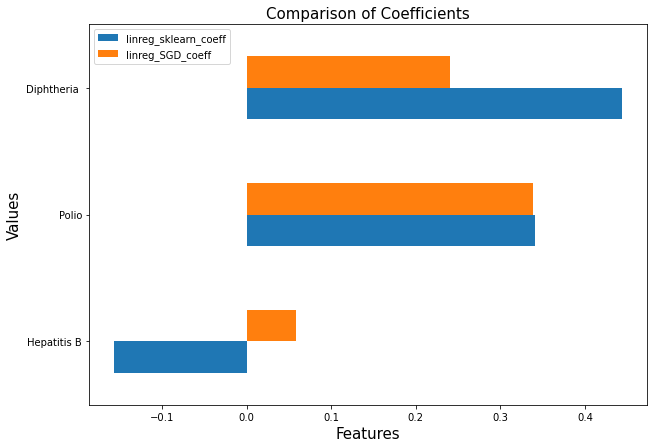

In [131]:
df_coeff = pd.DataFrame([MLR_model.coef_, linreg_with_SGD.coef_], columns = df_immunization.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])

# plot a side by side bar graph
# 'T' returns the transposed dataframe 
# set figure size using 'figsize'
fig = df_coeff.T.plot.barh( figsize=(10,7))

# set axes and plot labels
# set the text size using 'fontsize'
plt.title('Comparison of Coefficients', fontsize = 15)
fig.set_xlabel('Features', fontsize = 15)
fig.set_ylabel('Values', fontsize = 15)

# set the x-axis labels horizontally
plt.xticks(rotation = 'horizontal')

# set the position of legend
fig.legend(loc='upper left')

# display the plot
plt.show()

 We can observe that the coefficients obtained from the SGD model have smaller values as compared to the values obtained from the linear regression model using sklearn. Thus, we can say that the SGD model predicts the life expectancy with higher accuracy than the linear regression model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [133]:
# select the independent variables
X = df_lifeExp.iloc[:,:15]



# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)


In [134]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)


Root Mean Squared Error (RMSE) on training set:  2.6569


In [135]:
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on test set:  3.4243


In [137]:
# obtain the R-squared
r_square = MLR_model.score(X_train, y_train)

# obtain the adj. R-squared
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))

# print the R-squared and adj. R-squared values
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

The R-squared value is 0.8911156560434031 and the adjusted R-squared 0.8799480310222138


In [138]:
rmse_test - rmse_train


0.7674000000000003

Since there is not much difference in the RMSE of train and test set we may say there is no overfitting.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [140]:
# Yes Linear Regression can be used since Target Variable is Continuous Variables

# Variables have corelation with each other

To determine whether linear regression analysis can be performed on given data we check the following assumptions:
<br>1. Whether the target variable is numeric ?
<br>2. Is multicollinearity present in the data ?

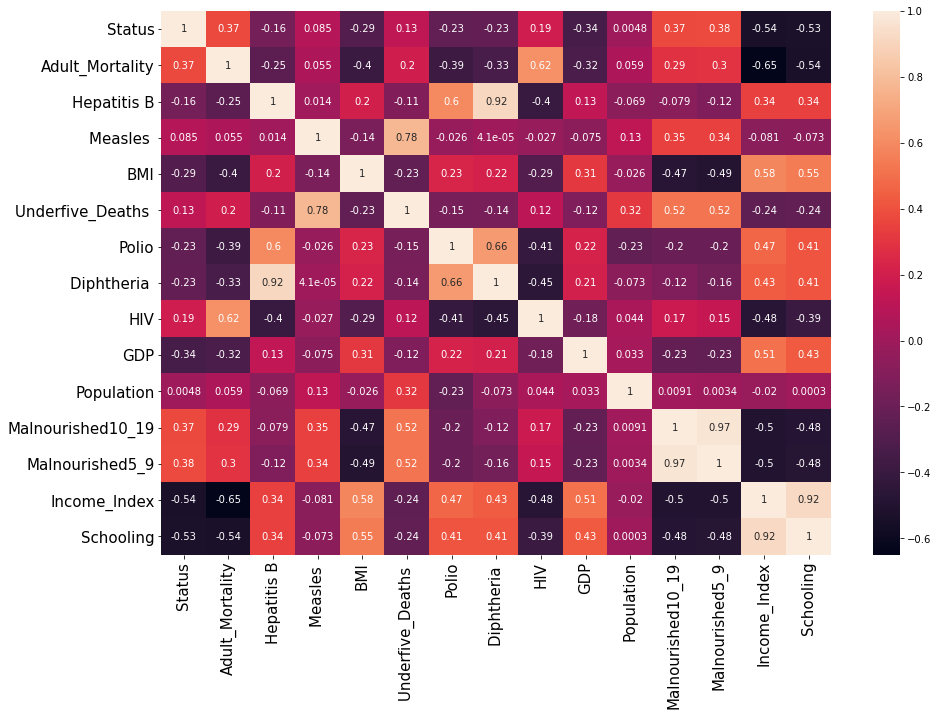

In [139]:
# set dimensions for the plot figure
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_features = df_lifeExp.iloc[:,:15]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size": 10})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()


From the correlation plot, we can see that the predictor variables `Malnourished10_19` and `Malnourished5_9` have a high positive correlation value (0.97). The variables `Hepatitis B` and `Diphtheria` have a high positive correlation value (0.92). Also the variables `Income_Index` and `Schooling` have a high positive correlation value (0.92). Hence before applying the regression model we need to alter the data to rectify this problem. 

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

`Ridge regression` reduces the sensitivity of regression parameters to multicollinearity. This is accomplished through penality applied to the cost function. Imposing a penalty function keeps the value of predictors below a pre-specified value.

In [141]:
# select the variable describing adult mortality rate
# reshape(): used to change the dimension of input since SGDRegressor expects atleast a 2-D numpy array
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 110, test_size = 0.2)

In [142]:
# initiate linear regression model
ridge = Ridge(alpha = 5.5)

# build the model using train data
# use fit() to fit the regression model
ridge_model = ridge.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = ridge_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = ridge_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on training set:  0.3528
Root Mean Squared Error (RMSE) on test set:  0.3533


We can see there is barely any difference between rmse values for train and test sets, hence ridge regression has generalized well even during presence of multicollinearity. <br>
<br>Multicollinearity can result in large and opposite signed  estimator values for correlated predictors, which can lead to false conclusion of a predictor being insignificant.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [143]:
# selecting the variables describing diseases: Measles, HIV
# selecting the variables describing immunization: Hepatitis B, Polio and Diphtheria
X = df_lifeExp.iloc[:,[3,8,2,6,7]]

# to estimate the regression coefficient , a constant termof '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)


# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [144]:
# building a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  5.7034
Root Mean Squared Error (RMSE) on test set:  5.7282


As we can see the difference between rmse values for the train and sets is very small, hence we conclude that there is no overfitting. We can use the least squares model to determine the significant variables.

In [145]:
# calculate p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])

# filter the variables with p-value less than 0.05
significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]

# get significant variables using index
# to_list: converts the variables to 'list' type
signi_var = significant_var.index.to_list()

# print the list of significant variables
signi_var

['const', 'HIV', 'Polio']

From the output we can see that, `HIV` and `Polio` are the features that contribute significantly in prediction of life expectancy for the considered model. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [146]:
# selecting the variables describing malnutrition: Malnourished10_19, Malnourished5_9
# selecting the variables describing diseases: Measles, HIV
X = df_lifeExp.iloc[:,[3,8,12,11]]

# create a dataframe to capture the features used in model
df_features = df_lifeExp.iloc[:,[12,11,3,8]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)

In [147]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  5.5044
Root Mean Squared Error (RMSE) on test set:  6.3994


We can see that there is a large difference in the RMSE of the train and the test set. This implies that our model has overfitted the training data. Hence we need to use lasso regression to identify the insignificant variables.

In [148]:
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'X'
X = X_scaler.fit_transform(X)

# standardize the target variable explicitly 
y = (y - y.mean()) / y.std()

In [149]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
lasso = Lasso(alpha = 1)

# fit the model on train set using fit()
lasso_model = lasso.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = lasso_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = lasso_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  5.578
Root Mean Squared Error (RMSE) on test set:  5.5802


In [150]:
# create a dataframe to store the variable names and their corresponding coefficient values
# pass the dictionary as data to the dataframe
# 'coef_' returns the value of each coefficient
df_lasso_coeff = pd.DataFrame(data = {'Variable': df_features.columns, 'Coefficient': lasso_model.coef_})

# print the variables having the coefficient equal to zero
# 'to_list()' converts the output to the list type
print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

Least significant variables obtained from Lasso Regression when alpha is 1: []


As we can see none of the coefficients have been reduced to zero by lasso regression. Thus all the variables considered for model significantly impact the target variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [152]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.0001)

# fit the model on train data using fit()
enet_model = enet.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = enet_model.predict(X_test)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = enet_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = enet_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.3581
Root Mean Squared Error (RMSE) on test set:  0.3544


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [153]:
# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [154]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  2.6569
Root Mean Squared Error (RMSE) on test set:  3.4243


In [155]:
# obtain the R-squared
r_square = MLR_model.score(X_train, y_train)

# obtain the adj. R-squared
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))

# print the R-squared and adj. R-squared values
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

The R-squared value is 0.8911156560434031 and the adjusted R-squared 0.8799480310222138


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [156]:
# select the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

Consider 5-fold cross validation.

In [157]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
 
# instantiate the Ridge() method
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 11}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
# select the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [159]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
 
# instantiate the Lasso() method
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression:', lasso_grid.best_params_)

Best parameters for Lasso Regression: {'alpha': 7}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
# select the variables describing malnutrition: Malnourished10_19, Malnourished5_9
# select the variables describing diseases: Measles, HIV
X = df_lifeExp.iloc[:,[12,11,3,8]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size = 0.2)

Consider 10-fold cross validation.

In [161]:
# create a dictionary with hyperparameters and its values
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
 
# instantiate the ElasticNet() method
enet = ElasticNet()

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 1.5, 'l1_ratio': 0.9} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
# selecte the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [163]:
# create a dictionary with hyperparameters and its values
# 'l1_ratio' is the elastic net mixing parameter
tuned_paramaters = [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

# instantiate the ElasticNet() method
enet = ElasticNet(alpha=0.8)

# use GridSearchCV() to find the optimal value of l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'l1_ratio': 0.005} 

